In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [4]:
df=pd.read_csv("G:\Python\Streamlit\election survey 2_csv.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\admin\AppData\Local\Temp\ipykernel_9748\192344801.py:1: SyntaxWarning: invalid escape sequence '\P'
  df=pd.read_csv("G:\Python\Streamlit\election survey 2_csv.csv")


In [5]:
df.head()

,Gender:\n,Age:\n,Educational Qualification:\n,Occupation:\n,religion \n,Area/locality\n,monthly household income \n,Will you vote in upcoming elections?\n,traditionaly supported\n,party/alliance currently in a stronger position ? \n,"If Lok Sabha elections are held tomorrow ,which party will you vote for? \n",most important election issue for you?,issues vs person?,"Voting Priorities?""","MP Satisfaction?""","""MP Performance Rating?""\n\n\n\n",current Govt. Satisfaction?,re_elect govt?
0,male,21 to 30,Postgraduate,Student,Hindu,Urban/Big city,Over Rs. 50001,Yes,party from National Democratic Alliance (ND),BJP,party from National Democratic Alliance (ND),Can't Say,Election issues,The performance the political party,No,Good,Yes,Yes
1,male,21 to 30,Graduate,Student,Hindu,Urban/Big city,Over Rs. 50001,Yes,Congress,BJP,Congress,Price rise /inflation,political leader's face/personality,The performance of the candidate/MP.,No,Poor,Yes,Yes
2,Female,46 to 60,Secondary School/Matric,Self-employed,Christian,Urban/Small city,"Rs. 20,000 to Rs. 50,000",Yes,party from National Democratic Alliance (ND),Indian National Developmental Inclusive Allian...,party from Indian National Developmental Inclu...,Unemployment,Election issues,The performance of the Prime Minister,No Response,Good,Yes,No
3,Female,61 to 75,Non-Literate,Farmer,Islam,Rural/Village,"Rs. 10,001 - Rs. 20,000",Yes,party from National Democratic Alliance (ND),BJP,party from National Democratic Alliance (ND),Farmer distress,political leader's face/personality,The performance of the candidate/MP.,No,Very poor,No,No
4,Female,21 to 30,Postgraduate,Employed (Govt.),No Response,Urban/Big city,"Rs. 20,000 to Rs. 50,000",No,BJP,BJP,BJP,Unemployment,No Response,The performance of the Prime Minister,Yes,Good,Yes,Yes


In [6]:
df.shape[0]

383

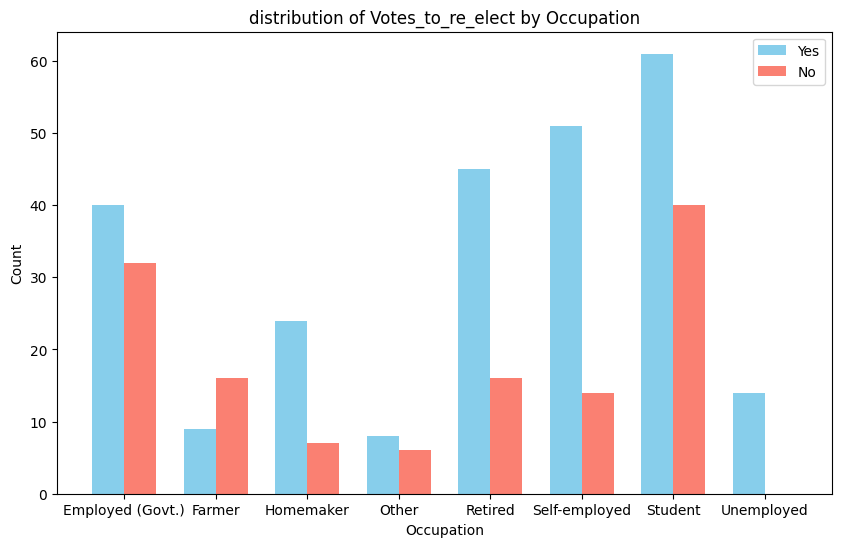

In [7]:
##distribution of votes to re_elect_govt by occupation

#occurrences of each combination of Occupation and Voting
pivot_table = df.pivot_table(index=' Occupation:\n', columns='re_elect govt?', aggfunc='size', fill_value=0)
#array of Occupation categories
occupations = pivot_table.index
# Width of each bar
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

#  bars for 'Yes' votes
ax.bar(np.arange(len(occupations)), pivot_table['Yes'], bar_width, label='Yes', color='skyblue')

#  bars for 'No' votes
ax.bar(np.arange(len(occupations)) + bar_width, pivot_table['No'], bar_width, label='No', color='salmon')

# Add labels, title, and legend
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')
ax.set_title('distribution of Votes_to_re_elect by Occupation')
ax.set_xticks(np.arange(len(occupations)) + bar_width / 2)
ax.set_xticklabels(occupations)
plt.legend()


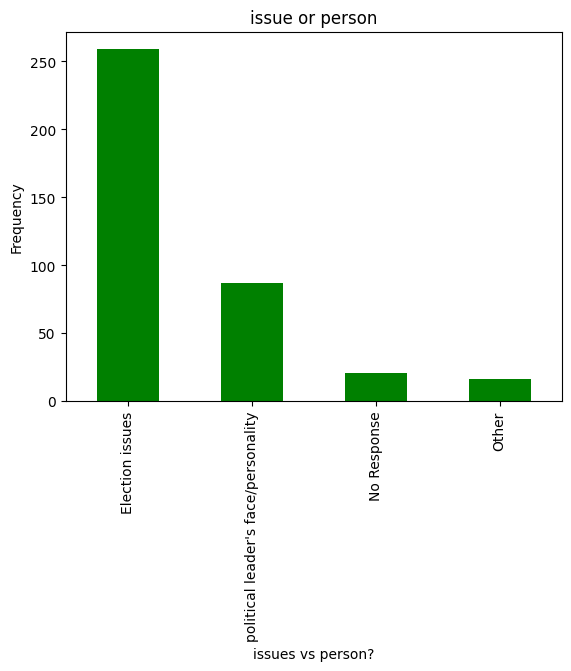

In [8]:
## imp election issues or personality
df['issues vs person?'].value_counts().plot(kind='bar', color='green', legend=False)
plt.title('issue or person')
#plt.xlabel('issues')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

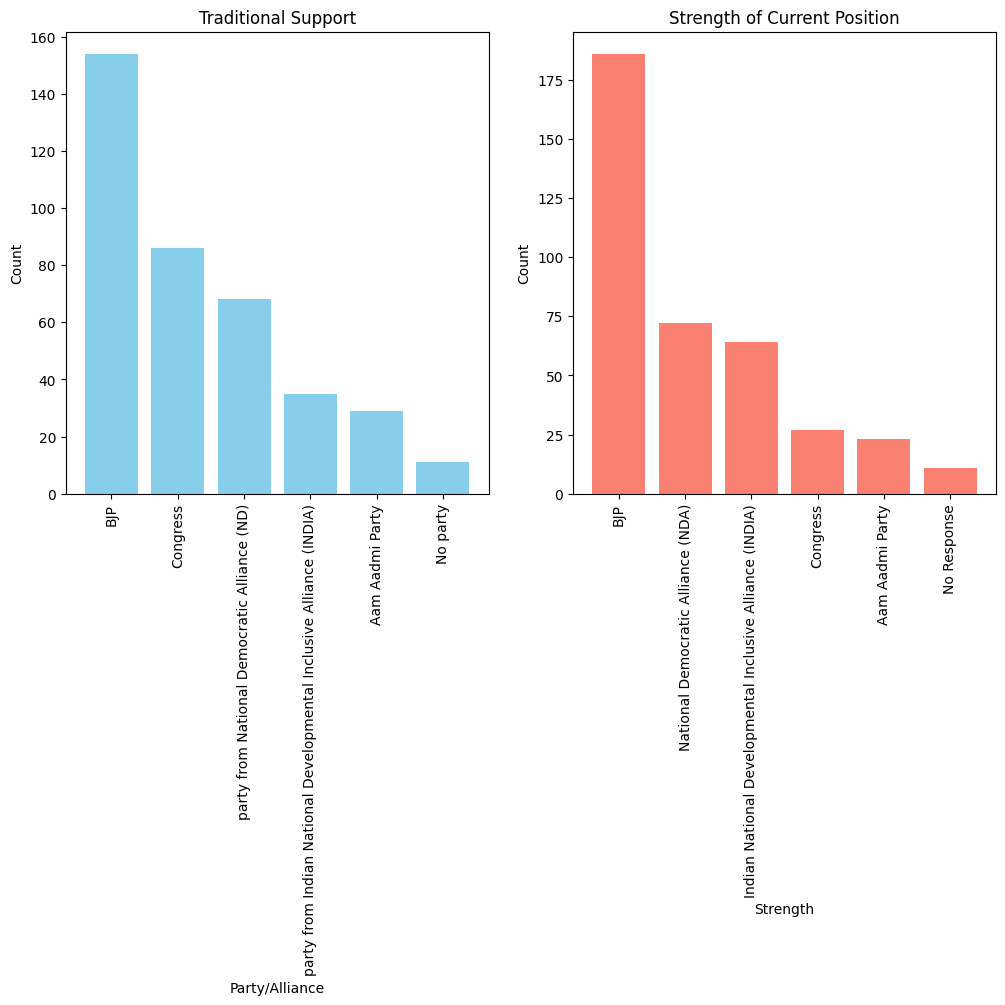

In [9]:
##count of tradictionly supported and currently there strong choice
trad_support_counts = df['traditionaly supported\n'].value_counts()
strength_counts = df['party/alliance currently in a stronger position ? \n'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].bar(trad_support_counts.index, trad_support_counts.values, color='skyblue')
axs[0].set_title('Traditional Support')
axs[0].set_xlabel('Party/Alliance')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=90)

axs[1].bar(strength_counts.index, strength_counts.values, color='salmon')
axs[1].set_title('Strength of Current Position')
axs[1].set_xlabel('Strength')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=90)
plt.show()

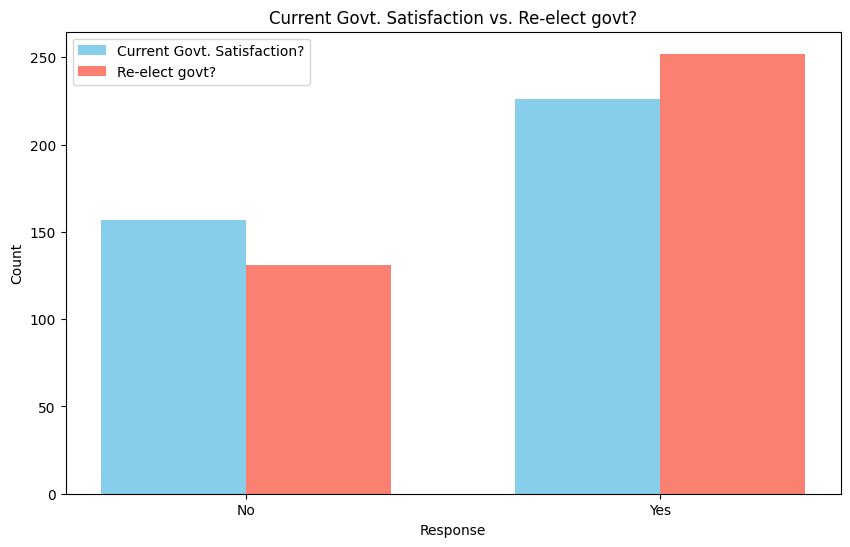

In [10]:
##current govt satisfaction vs relecting govt
import numpy as np
govt_satisfaction_counts = df['current Govt. Satisfaction?'].value_counts()
reelect_counts = df['re_elect govt?'].value_counts()

#unique categories from both columns
categories = np.union1d(df['current Govt. Satisfaction?'], df['re_elect govt?'])

#array of category indices for positioning bars
indices = np.arange(len(categories))
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

#bars for 'Current Govt. Satisfaction?' column
ax.bar(indices - bar_width/2, govt_satisfaction_counts.reindex(categories, fill_value=0), bar_width, label='Current Govt. Satisfaction?', color='skyblue')

# bars for 'Re-elect govt?' column
ax.bar(indices + bar_width/2, reelect_counts.reindex(categories, fill_value=0), bar_width, label='Re-elect govt?', color='salmon')

ax.set_xlabel('Response')
ax.set_ylabel('Count')
ax.set_title('Current Govt. Satisfaction vs. Re-elect govt?')
ax.set_xticks(indices)
ax.set_xticklabels(categories)
plt.legend()

# Show plot
plt.show()

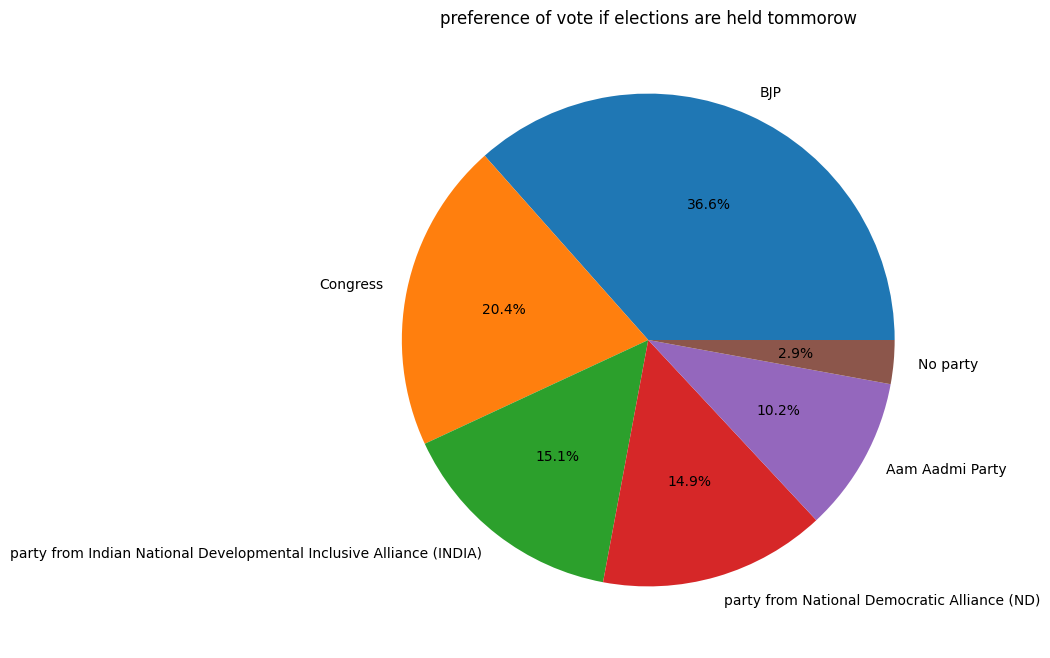

In [11]:
##preference of vote if elections are held tommorow
vote_counts = df[' If Lok Sabha elections are held tomorrow ,which party will you vote for? \n'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(vote_counts, labels=vote_counts.index, autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('preference of vote if elections are held tommorow')
plt.show()

In [12]:
df.isnull().sum()

Gender:\n                                                                       0
 Age:\n                                                                         0
 Educational Qualification:\n                                                   0
 Occupation:\n                                                                  0
religion \n                                                                     0
Area/locality\n                                                                 9
 monthly household income \n                                                    0
 Will you vote in upcoming elections?\n                                         0
traditionaly supported\n                                                        0
party/alliance currently in a stronger position ? \n                            0
 If Lok Sabha elections are held tomorrow ,which party will you vote for? \n    0
 most important election issue for you?                                         0
issues vs person

**ENCODING**

In [13]:
##GENDER ENCODING

df = pd.get_dummies(df, columns=['Gender:\n'], prefix='Gender:\n', drop_first=True)


In [14]:
df['Gender:\n_male'] = df['Gender:\n_male'].astype(int)


In [15]:
print(df.columns)


Index([' Age:\n', ' Educational Qualification:\n', ' Occupation:\n',
       'religion \n', 'Area/locality\n', ' monthly household income \n',
       ' Will you vote in upcoming elections?\n', 'traditionaly supported\n',
       'party/alliance currently in a stronger position ? \n',
       ' If Lok Sabha elections are held tomorrow ,which party will you vote for? \n',
       ' most important election issue for you?', 'issues vs person?',
       'Voting Priorities?"', 'MP Satisfaction?"',
       '"MP Performance Rating?"\n\n\n\n', 'current Govt. Satisfaction?',
       're_elect govt?', 'Gender:\n_male'],
      dtype='object')


In [16]:
##age encoding

age_mapping = {
    '21 to 30': 1,
    '31 to 45': 2,
    '46 to 60': 3,
    '61 to 75': 4,
    '75 and above': 5
}

df['Age'] = df[' Age:\n'].map(age_mapping)


In [17]:
df.drop(columns=[' Age:\n'], inplace=True)


In [18]:
##education encoding

df[' Educational Qualification:\n'].unique()

array(['Postgraduate', 'Graduate', 'Secondary School/Matric',
       'Non-Literate', 'Higher Secondary/Intermediate', 'Primary School'],
      dtype=object)

In [19]:

education_mapping = {
    'Non-Literate': 0,
    'Primary School': 1,
    'Secondary School/Matric': 2,
    'Higher Secondary/Intermediate': 3,
    'Graduate': 4,
    'Postgraduate': 5
}

# Map the educational qualifications to numerical values
df['Educational Qualification'] = df[' Educational Qualification:\n'].map(education_mapping)



In [20]:
df.drop(columns=[' Educational Qualification:\n'], inplace=True)


In [21]:
##occupation encoding

df[' Occupation:\n'].unique()

array(['Student', 'Self-employed', 'Farmer', 'Employed (Govt.)', 'Other',
       'Homemaker', 'Retired', 'Unemployed'], dtype=object)

In [22]:
df = pd.get_dummies(df, columns=[' Occupation:\n'], prefix=' Occupation:\n')


In [23]:
columns_to_convert = [' Occupation:\n_Employed (Govt.)', ' Occupation:\n_Farmer',
       ' Occupation:\n_Homemaker', ' Occupation:\n_Other',
       ' Occupation:\n_Retired', ' Occupation:\n_Self-employed',
       ' Occupation:\n_Student', ' Occupation:\n_Unemployed']

df[columns_to_convert] = df[columns_to_convert].replace({True: 1, False: 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_9748\3193151044.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_convert] = df[columns_to_convert].replace({True: 1, False: 0})


In [24]:
df.rename(columns={'religion \n': 'Religion'}, inplace=True)


In [25]:
df = pd.get_dummies(df, columns=['Religion'], prefix='Religion')


In [26]:
df['Religion_No Response'].sum()

10

In [27]:
df = df[df['Religion_No Response'] == False]


In [28]:
df.drop(columns=['Religion_No Response'],inplace=True)

In [29]:
df.head()

,Area/locality\n,monthly household income \n,Will you vote in upcoming elections?\n,traditionaly supported\n,party/alliance currently in a stronger position ? \n,"If Lok Sabha elections are held tomorrow ,which party will you vote for? \n",most important election issue for you?,issues vs person?,"Voting Priorities?""","MP Satisfaction?""",...,Occupation:\n_Other,Occupation:\n_Retired,Occupation:\n_Self-employed,Occupation:\n_Student,Occupation:\n_Unemployed,Religion_Buddhist,Religion_Christian,Religion_Hindu,Religion_Islam,Religion_Other
0,Urban/Big city,Over Rs. 50001,Yes,party from National Democratic Alliance (ND),BJP,party from National Democratic Alliance (ND),Can't Say,Election issues,The performance the political party,No,...,0,0,0,1,0,False,False,True,False,False
1,Urban/Big city,Over Rs. 50001,Yes,Congress,BJP,Congress,Price rise /inflation,political leader's face/personality,The performance of the candidate/MP.,No,...,0,0,0,1,0,False,False,True,False,False
2,Urban/Small city,"Rs. 20,000 to Rs. 50,000",Yes,party from National Democratic Alliance (ND),Indian National Developmental Inclusive Allian...,party from Indian National Developmental Inclu...,Unemployment,Election issues,The performance of the Prime Minister,No Response,...,0,0,1,0,0,False,True,False,False,False
3,Rural/Village,"Rs. 10,001 - Rs. 20,000",Yes,party from National Democratic Alliance (ND),BJP,party from National Democratic Alliance (ND),Farmer distress,political leader's face/personality,The performance of the candidate/MP.,No,...,0,0,0,0,0,False,False,False,True,False
5,Urban/Small city,"Rs. 20,000 to Rs. 50,000",Yes,party from National Democratic Alliance (ND),BJP,Aam Aadmi Party,"Discrimination against women, Crimes against w...",Other,The performance of the candidate/MP.,Yes,...,0,0,0,1,0,True,False,False,False,False


In [30]:
df['Area/locality\n'].isna().sum()


9

In [31]:
df.dropna(subset=['Area/locality\n'], inplace=True)


In [32]:
df.rename(columns={'Area/locality\n': 'Locality'}, inplace=True)


In [33]:
df = pd.get_dummies(df, columns=['Locality'], prefix='Locality')


In [34]:
df.columns

Index([' monthly household income \n',
       ' Will you vote in upcoming elections?\n', 'traditionaly supported\n',
       'party/alliance currently in a stronger position ? \n',
       ' If Lok Sabha elections are held tomorrow ,which party will you vote for? \n',
       ' most important election issue for you?', 'issues vs person?',
       'Voting Priorities?"', 'MP Satisfaction?"',
       '"MP Performance Rating?"\n\n\n\n', 'current Govt. Satisfaction?',
       're_elect govt?', 'Gender:\n_male', 'Age', 'Educational Qualification',
       ' Occupation:\n_Employed (Govt.)', ' Occupation:\n_Farmer',
       ' Occupation:\n_Homemaker', ' Occupation:\n_Other',
       ' Occupation:\n_Retired', ' Occupation:\n_Self-employed',
       ' Occupation:\n_Student', ' Occupation:\n_Unemployed',
       'Religion_Buddhist', 'Religion_Christian', 'Religion_Hindu',
       'Religion_Islam', 'Religion_Other', 'Locality_Rural/Village',
       'Locality_Urban/Big city', 'Locality_Urban/Small city'],
    

In [35]:
columns_to_convert = ['Religion_Buddhist', 'Religion_Christian', 'Religion_Hindu',
       'Religion_Islam', 'Religion_Other',
       'Locality_Rural/Village', 'Locality_Urban/Big city',
       'Locality_Urban/Small city']

df[columns_to_convert] = df[columns_to_convert].replace({True: 1, False: 0})

C:\Users\admin\AppData\Local\Temp\ipykernel_9748\871887075.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_convert] = df[columns_to_convert].replace({True: 1, False: 0})


In [36]:
##encoding mothly income
df.rename(columns={' monthly household income \n': 'Monthly Income'}, inplace=True)




In [37]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of categories based on their ordinal relationship
income_order = ['Over Rs. 50001', 'Rs. 20,000 to Rs. 50,000',
       'Rs. 10,001 - Rs. 20,000', 'Up to Rs.10,000']

# Initialize OrdinalEncoder with specified order
ordinal_encoder = OrdinalEncoder(categories=[income_order])

# Apply ordinal encoding to the 'monthly household income' column
df['Income'] = ordinal_encoder.fit_transform(df[['Monthly Income']])



In [38]:
df.drop(columns=['Monthly Income'],inplace=True)

In [39]:
df.head()

,Will you vote in upcoming elections?\n,traditionaly supported\n,party/alliance currently in a stronger position ? \n,"If Lok Sabha elections are held tomorrow ,which party will you vote for? \n",most important election issue for you?,issues vs person?,"Voting Priorities?""","MP Satisfaction?""","""MP Performance Rating?""\n\n\n\n",current Govt. Satisfaction?,...,Occupation:\n_Unemployed,Religion_Buddhist,Religion_Christian,Religion_Hindu,Religion_Islam,Religion_Other,Locality_Rural/Village,Locality_Urban/Big city,Locality_Urban/Small city,Income
0,Yes,party from National Democratic Alliance (ND),BJP,party from National Democratic Alliance (ND),Can't Say,Election issues,The performance the political party,No,Good,Yes,...,0,0,0,1,0,0,0,1,0,0.0
1,Yes,Congress,BJP,Congress,Price rise /inflation,political leader's face/personality,The performance of the candidate/MP.,No,Poor,Yes,...,0,0,0,1,0,0,0,1,0,0.0
2,Yes,party from National Democratic Alliance (ND),Indian National Developmental Inclusive Allian...,party from Indian National Developmental Inclu...,Unemployment,Election issues,The performance of the Prime Minister,No Response,Good,Yes,...,0,0,1,0,0,0,0,0,1,1.0
3,Yes,party from National Democratic Alliance (ND),BJP,party from National Democratic Alliance (ND),Farmer distress,political leader's face/personality,The performance of the candidate/MP.,No,Very poor,No,...,0,0,0,0,1,0,1,0,0,2.0
5,Yes,party from National Democratic Alliance (ND),BJP,Aam Aadmi Party,"Discrimination against women, Crimes against w...",Other,The performance of the candidate/MP.,Yes,Good,Yes,...,0,1,0,0,0,0,0,0,1,1.0


In [40]:
df['will vote']=df[' Will you vote in upcoming elections?\n']

In [41]:
df.drop(columns=[' Will you vote in upcoming elections?\n'],inplace=True)

In [42]:
df['will vote'] = df['will vote'].replace({'Yes': 1, 'No': 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_9748\1128469734.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['will vote'] = df['will vote'].replace({'Yes': 1, 'No': 0})


In [43]:
###

In [44]:
df.columns=['trad_supp',
       'current_strong_pos',
       'your_vote_for',
       'imp_issue', 'issues vs personality?',
       'Voting Priorities', 'MP Satisfaction?',
       'MP Performance Rating', 'current Govt. Satisfaction',
       're_elect govt', 'Gender_male', 'Age', 'Educational Qualification',
       ' Occupation_Employed (Govt.)', ' Occupation_Farmer',
       ' Occupation_Homemaker', ' Occupation_Other',
       ' Occupation_Retired', ' Occupation_Self-employed',
       ' Occupation_Student', ' Occupation_Unemployed','Religion_Buddhist', 'Religion_Christian', 'Religion_Hindu',
       'Religion_Islam', 'Religion_Other', 'Locality_Rural/Village',
       'Locality_Urban/Big city', 'Locality_Urban/Small city', 'Income',
       'will vote']

In [45]:
df.columns

Index(['trad_supp', 'current_strong_pos', 'your_vote_for', 'imp_issue',
       'issues vs personality?', 'Voting Priorities', 'MP Satisfaction?',
       'MP Performance Rating', 'current Govt. Satisfaction', 're_elect govt',
       'Gender_male', 'Age', 'Educational Qualification',
       ' Occupation_Employed (Govt.)', ' Occupation_Farmer',
       ' Occupation_Homemaker', ' Occupation_Other', ' Occupation_Retired',
       ' Occupation_Self-employed', ' Occupation_Student',
       ' Occupation_Unemployed', 'Religion_Buddhist', 'Religion_Christian',
       'Religion_Hindu', 'Religion_Islam', 'Religion_Other',
       'Locality_Rural/Village', 'Locality_Urban/Big city',
       'Locality_Urban/Small city', 'Income', 'will vote'],
      dtype='object')

In [46]:
df.shape[0]

364

In [47]:
##traditionally supported encoding
df['trad_supp'].unique()

array(['party from National Democratic Alliance (ND)', 'Congress',
       'party from Indian National Developmental Inclusive Alliance (INDIA)',
       'BJP', 'Aam Aadmi Party', 'No party'], dtype=object)

In [48]:
df=df[df['trad_supp'] != 'No party']


In [49]:
df=pd.get_dummies(df,columns=['trad_supp'])

In [50]:
map={
    'trad_supp_Aam Aadmi Party':'trad_AAP',
    'trad_supp_BJP':'trad_BJP'	,
    'trad_supp_Congress':'trad_congress',
    'trad_supp_party from Indian National Developmental Inclusive Alliance (INDIA)':'trad_india',
    'trad_supp_party from National Democratic Alliance (ND)':'trad_nda'
}

df=df.rename(columns=map)

In [51]:
##curent strong
df['current_strong_pos'].unique()

array(['BJP', 'Indian National Developmental Inclusive Alliance (INDIA)',
       'National Democratic Alliance (NDA)', 'Aam Aadmi Party',
       'Congress'], dtype=object)

In [52]:
df=pd.get_dummies(df,columns=['current_strong_pos'])

In [53]:
map2={
    'current_strong_pos_Aam Aadmi Party':'strg_aap',
    'current_strong_pos_BJP':'strg_bjp',
    'current_strong_pos_Congress':'strg_congress',
    'current_strong_pos_Indian National Developmental Inclusive Alliance (INDIA)':'strg_india',
    'current_strong_pos_National Democratic Alliance (NDA)':'strg_nda'
}

df=df.rename(columns=map2)

In [54]:
df.head()

,your_vote_for,imp_issue,issues vs personality?,Voting Priorities,MP Satisfaction?,MP Performance Rating,current Govt. Satisfaction,re_elect govt,Gender_male,Age,...,trad_AAP,trad_BJP,trad_congress,trad_india,trad_nda,strg_aap,strg_bjp,strg_congress,strg_india,strg_nda
0,party from National Democratic Alliance (ND),Can't Say,Election issues,The performance the political party,No,Good,Yes,Yes,1,1.0,...,False,False,False,False,True,False,True,False,False,False
1,Congress,Price rise /inflation,political leader's face/personality,The performance of the candidate/MP.,No,Poor,Yes,Yes,1,1.0,...,False,False,True,False,False,False,True,False,False,False
2,party from Indian National Developmental Inclu...,Unemployment,Election issues,The performance of the Prime Minister,No Response,Good,Yes,No,0,3.0,...,False,False,False,False,True,False,False,False,True,False
3,party from National Democratic Alliance (ND),Farmer distress,political leader's face/personality,The performance of the candidate/MP.,No,Very poor,No,No,0,4.0,...,False,False,False,False,True,False,True,False,False,False
5,Aam Aadmi Party,"Discrimination against women, Crimes against w...",Other,The performance of the candidate/MP.,Yes,Good,Yes,Yes,1,NaN,...,False,False,False,False,True,False,True,False,False,False


In [55]:
##making copy of df for "your vote" targeting
df_vote=df.copy()

In [56]:
##your vote encoding
df['your_vote_for'].unique()

array(['party from National Democratic Alliance (ND)', 'Congress',
       'party from Indian National Developmental Inclusive Alliance (INDIA)',
       'Aam Aadmi Party', 'BJP'], dtype=object)

In [57]:
df=pd.get_dummies(df,columns=['your_vote_for'])



In [58]:
map3={
    'your_vote_for_Aam Aadmi Party':'vote_aap',
    'your_vote_for_BJP':'vote_bjp',
    'your_vote_for_Congress':'vote_congress',
    'your_vote_for_party from Indian National Developmental Inclusive Alliance (INDIA)':'vote_india',
    'your_vote_for_party from National Democratic Alliance (ND)':'vote_nda'

}

df=df.rename(columns=map3)

In [59]:
##isuues vs personality encoding
df['issues vs personality?'].unique()

array(['Election issues', "political leader's face/personality", 'Other'],
      dtype=object)

In [60]:
df=pd.get_dummies(df,columns=['issues vs personality?'])


In [61]:
map4={
    'issues vs personality?_Election issues':'electn_isuues',
    'issues vs personality?_Other':'other',
    "issues vs personality?_political leader's face/personality":"leader"

}

df=df.rename(columns=map4)

In [62]:
##encoding mps satisfaction
df['MP Satisfaction?'].unique()


array(['No', 'No Response', 'Yes'], dtype=object)

In [63]:
m = len(df[df['MP Satisfaction?'] == 'No Response'])
m

28

In [64]:
most_frequent_value = df['MP Satisfaction?'].mode()[0]
entry_to_replace = 'No Response'
df.loc[df['MP Satisfaction?'] == entry_to_replace, 'MP Satisfaction?'] = most_frequent_value

In [65]:
df['MP Satisfaction?'] = df['MP Satisfaction?'].replace({'Yes': 1, 'No': 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_9748\2652121640.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MP Satisfaction?'] = df['MP Satisfaction?'].replace({'Yes': 1, 'No': 0})


In [66]:
##encoding 'MP Performance Rating'
df['MP Performance Rating'].unique()

array(['Good', 'Poor', 'Very poor', 'No Response', 'Satisfactory',
       'Excellent'], dtype=object)

In [67]:
m = len(df[df['MP Performance Rating'] == 'No Response'])
m

23

In [68]:
most_frequent_value = df['MP Performance Rating'].mode()[0]
entry_to_replace = 'No Response'
df.loc[df['MP Performance Rating'] == entry_to_replace, 'MP Performance Rating'] = most_frequent_value


In [69]:
ordinal_mapping = {
    'Very poor': 1,
    'Poor': 2,
    'Satisfactory': 3,
    'Good': 4,
    'Excellent': 5
}

df['MP Performance Rating'] = df['MP Performance Rating'].map(ordinal_mapping)


In [70]:
df.head()

,imp_issue,Voting Priorities,MP Satisfaction?,MP Performance Rating,current Govt. Satisfaction,re_elect govt,Gender_male,Age,Educational Qualification,Occupation_Employed (Govt.),...,strg_india,strg_nda,vote_aap,vote_bjp,vote_congress,vote_india,vote_nda,electn_isuues,other,leader
0,Can't Say,The performance the political party,0,4,Yes,Yes,1,1.0,5,0,...,False,False,False,False,False,False,True,True,False,False
1,Price rise /inflation,The performance of the candidate/MP.,0,2,Yes,Yes,1,1.0,4,0,...,False,False,False,False,True,False,False,False,False,True
2,Unemployment,The performance of the Prime Minister,0,4,Yes,No,0,3.0,2,0,...,True,False,False,False,False,True,False,True,False,False
3,Farmer distress,The performance of the candidate/MP.,0,1,No,No,0,4.0,0,0,...,False,False,False,False,False,False,True,False,False,True
5,"Discrimination against women, Crimes against w...",The performance of the candidate/MP.,1,4,Yes,Yes,1,NaN,2,0,...,False,False,True,False,False,False,False,False,True,False


In [71]:
##encoding current gov
df['current Govt. Satisfaction'].unique()

array(['Yes', 'No'], dtype=object)

In [72]:
df['current Govt. Satisfaction'] = df['current Govt. Satisfaction'].replace({'Yes': 1, 'No': 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_9748\741608000.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['current Govt. Satisfaction'] = df['current Govt. Satisfaction'].replace({'Yes': 1, 'No': 0})


In [73]:
##encoding reelct govt
df['re_elect govt'].unique()

array(['Yes', 'No'], dtype=object)

In [74]:
df['re_elect govt'] = df['re_elect govt'].replace({'Yes': 1, 'No': 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_9748\3062950203.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['re_elect govt'] = df['re_elect govt'].replace({'Yes': 1, 'No': 0})


In [75]:
df = df.replace({True: 1, False: 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_9748\2180546242.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


df is main file, now creating new  [dr2], dataset w/o 2 column (categorical)

In [76]:
df2=df.drop(columns=['imp_issue','Voting Priorities'])
df2.head()

,MP Satisfaction?,MP Performance Rating,current Govt. Satisfaction,re_elect govt,Gender_male,Age,Educational Qualification,Occupation_Employed (Govt.),Occupation_Farmer,Occupation_Homemaker,...,strg_india,strg_nda,vote_aap,vote_bjp,vote_congress,vote_india,vote_nda,electn_isuues,other,leader
0,0,4,1,1,1,1.0,5,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,2,1,1,1,1.0,4,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,4,1,0,0,3.0,2,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3,0,1,0,0,0,4.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
5,1,4,1,1,1,NaN,2,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [77]:
df2.isnull().sum()

MP Satisfaction?                 0
MP Performance Rating            0
current Govt. Satisfaction       0
re_elect govt                    0
Gender_male                      0
Age                             42
Educational Qualification        0
 Occupation_Employed (Govt.)     0
 Occupation_Farmer               0
 Occupation_Homemaker            0
 Occupation_Other                0
 Occupation_Retired              0
 Occupation_Self-employed        0
 Occupation_Student              0
 Occupation_Unemployed           0
Religion_Buddhist                0
Religion_Christian               0
Religion_Hindu                   0
Religion_Islam                   0
Religion_Other                   0
Locality_Rural/Village           0
Locality_Urban/Big city          0
Locality_Urban/Small city        0
Income                           0
will vote                        0
trad_AAP                         0
trad_BJP                         0
trad_congress                    0
trad_india          

In [78]:
column_mode = df2['Age'].mode()[0]

In [79]:
df2['Age'].fillna(column_mode, inplace=True)
#now no null values

C:\Users\admin\AppData\Local\Temp\ipykernel_9748\2880018427.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Age'].fillna(column_mode, inplace=True)


**EDA**

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt


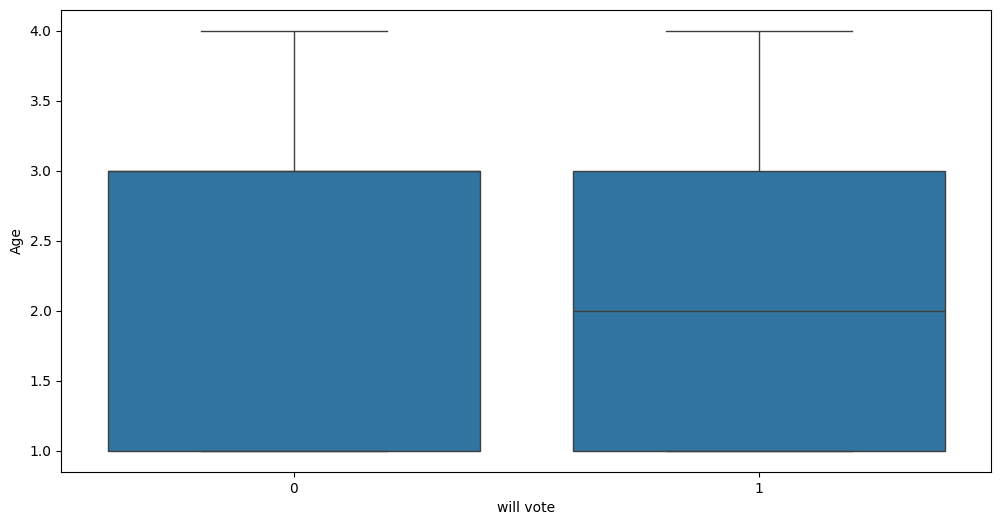

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='will vote', y='Age', data=df2)
plt.show()

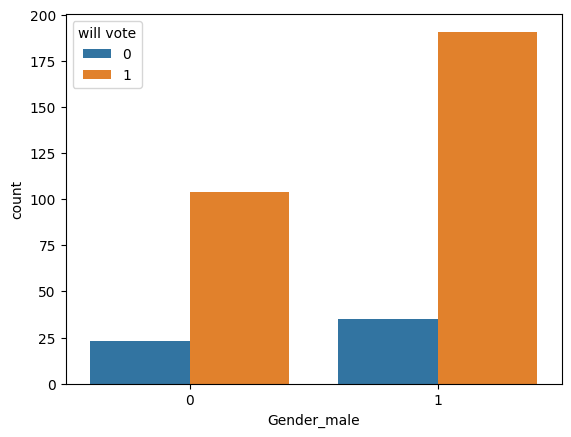

In [82]:
sns.countplot(x='Gender_male', data=df2, hue='will vote')
plt.show()

In [83]:
df2.head()

,MP Satisfaction?,MP Performance Rating,current Govt. Satisfaction,re_elect govt,Gender_male,Age,Educational Qualification,Occupation_Employed (Govt.),Occupation_Farmer,Occupation_Homemaker,...,strg_india,strg_nda,vote_aap,vote_bjp,vote_congress,vote_india,vote_nda,electn_isuues,other,leader
0,0,4,1,1,1,1.0,5,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,2,1,1,1,1.0,4,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,4,1,0,0,3.0,2,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3,0,1,0,0,0,4.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
5,1,4,1,1,1,1.0,2,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [84]:
df2.columns

Index(['MP Satisfaction?', 'MP Performance Rating',
       'current Govt. Satisfaction', 're_elect govt', 'Gender_male', 'Age',
       'Educational Qualification', ' Occupation_Employed (Govt.)',
       ' Occupation_Farmer', ' Occupation_Homemaker', ' Occupation_Other',
       ' Occupation_Retired', ' Occupation_Self-employed',
       ' Occupation_Student', ' Occupation_Unemployed', 'Religion_Buddhist',
       'Religion_Christian', 'Religion_Hindu', 'Religion_Islam',
       'Religion_Other', 'Locality_Rural/Village', 'Locality_Urban/Big city',
       'Locality_Urban/Small city', 'Income', 'will vote', 'trad_AAP',
       'trad_BJP', 'trad_congress', 'trad_india', 'trad_nda', 'strg_aap',
       'strg_bjp', 'strg_congress', 'strg_india', 'strg_nda', 'vote_aap',
       'vote_bjp', 'vote_congress', 'vote_india', 'vote_nda', 'electn_isuues',
       'other', 'leader'],
      dtype='object')

**now working on df_vote , where target variable is 'your_vote_for'**

In [85]:
df_vote.head()

,your_vote_for,imp_issue,issues vs personality?,Voting Priorities,MP Satisfaction?,MP Performance Rating,current Govt. Satisfaction,re_elect govt,Gender_male,Age,...,trad_AAP,trad_BJP,trad_congress,trad_india,trad_nda,strg_aap,strg_bjp,strg_congress,strg_india,strg_nda
0,party from National Democratic Alliance (ND),Can't Say,Election issues,The performance the political party,No,Good,Yes,Yes,1,1.0,...,False,False,False,False,True,False,True,False,False,False
1,Congress,Price rise /inflation,political leader's face/personality,The performance of the candidate/MP.,No,Poor,Yes,Yes,1,1.0,...,False,False,True,False,False,False,True,False,False,False
2,party from Indian National Developmental Inclu...,Unemployment,Election issues,The performance of the Prime Minister,No Response,Good,Yes,No,0,3.0,...,False,False,False,False,True,False,False,False,True,False
3,party from National Democratic Alliance (ND),Farmer distress,political leader's face/personality,The performance of the candidate/MP.,No,Very poor,No,No,0,4.0,...,False,False,False,False,True,False,True,False,False,False
5,Aam Aadmi Party,"Discrimination against women, Crimes against w...",Other,The performance of the candidate/MP.,Yes,Good,Yes,Yes,1,NaN,...,False,False,False,False,True,False,True,False,False,False


In [86]:
df_vote=df_vote.drop(columns=['imp_issue','Voting Priorities'])


In [87]:
df_vote=pd.get_dummies(df_vote,columns=['issues vs personality?'])


In [88]:
map4={
    'issues vs personality?_Election issues':'electn_isuues',
    'issues vs personality?_Other':'other',
    "issues vs personality?_political leader's face/personality":"leader"

}

df_vote=df_vote.rename(columns=map4)

In [89]:
most_frequent_value = df_vote['MP Satisfaction?'].mode()[0]
entry_to_replace = 'No Response'
df_vote.loc[df_vote['MP Satisfaction?'] == entry_to_replace, 'MP Satisfaction?'] = most_frequent_value

In [90]:
df_vote['MP Satisfaction?'] = df_vote['MP Satisfaction?'].replace({'Yes': 1, 'No': 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_9748\3367761902.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_vote['MP Satisfaction?'] = df_vote['MP Satisfaction?'].replace({'Yes': 1, 'No': 0})


In [91]:
most_frequent_value = df_vote['MP Performance Rating'].mode()[0]
entry_to_replace = 'No Response'
df_vote.loc[df_vote['MP Performance Rating'] == entry_to_replace, 'MP Performance Rating'] = most_frequent_value


In [92]:
ordinal_mapping = {
    'Very poor': 1,
    'Poor': 2,
    'Satisfactory': 3,
    'Good': 4,
    'Excellent': 5
}

df_vote['MP Performance Rating'] = df_vote['MP Performance Rating'].map(ordinal_mapping)


In [93]:
df_vote['current Govt. Satisfaction'] = df_vote['current Govt. Satisfaction'].replace({'Yes': 1, 'No': 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_9748\2197374341.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_vote['current Govt. Satisfaction'] = df_vote['current Govt. Satisfaction'].replace({'Yes': 1, 'No': 0})


In [94]:
df_vote['re_elect govt'] = df_vote['re_elect govt'].replace({'Yes': 1, 'No': 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_9748\3464559307.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_vote['re_elect govt'] = df_vote['re_elect govt'].replace({'Yes': 1, 'No': 0})


In [95]:
df_vote = df_vote.replace({True: 1, False: 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_9748\424938468.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_vote = df_vote.replace({True: 1, False: 0})


In [96]:
df_vote.head()

,your_vote_for,MP Satisfaction?,MP Performance Rating,current Govt. Satisfaction,re_elect govt,Gender_male,Age,Educational Qualification,Occupation_Employed (Govt.),Occupation_Farmer,...,trad_india,trad_nda,strg_aap,strg_bjp,strg_congress,strg_india,strg_nda,electn_isuues,other,leader
0,party from National Democratic Alliance (ND),0,4,1,1,1,1.0,5,0,0,...,0,1,0,1,0,0,0,1,0,0
1,Congress,0,2,1,1,1,1.0,4,0,0,...,0,0,0,1,0,0,0,0,0,1
2,party from Indian National Developmental Inclu...,0,4,1,0,0,3.0,2,0,0,...,0,1,0,0,0,1,0,1,0,0
3,party from National Democratic Alliance (ND),0,1,0,0,0,4.0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
5,Aam Aadmi Party,1,4,1,1,1,NaN,2,0,0,...,0,1,0,1,0,0,0,0,1,0


In [97]:
df_vote.isnull().sum()

your_vote_for                    0
MP Satisfaction?                 0
MP Performance Rating            0
current Govt. Satisfaction       0
re_elect govt                    0
Gender_male                      0
Age                             42
Educational Qualification        0
 Occupation_Employed (Govt.)     0
 Occupation_Farmer               0
 Occupation_Homemaker            0
 Occupation_Other                0
 Occupation_Retired              0
 Occupation_Self-employed        0
 Occupation_Student              0
 Occupation_Unemployed           0
Religion_Buddhist                0
Religion_Christian               0
Religion_Hindu                   0
Religion_Islam                   0
Religion_Other                   0
Locality_Rural/Village           0
Locality_Urban/Big city          0
Locality_Urban/Small city        0
Income                           0
will vote                        0
trad_AAP                         0
trad_BJP                         0
trad_congress       

In [98]:
df_vote['Age'].fillna(df['Age'].mode()[0],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_9748\2071408050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_vote['Age'].fillna(df['Age'].mode()[0],inplace=True)


In [99]:
df_vote['your_vote_for'].unique()

array(['party from National Democratic Alliance (ND)', 'Congress',
       'party from Indian National Developmental Inclusive Alliance (INDIA)',
       'Aam Aadmi Party', 'BJP'], dtype=object)

In [100]:
le = LabelEncoder()
df_vote['your_vote_for'] = le.fit_transform(df_vote['your_vote_for'])

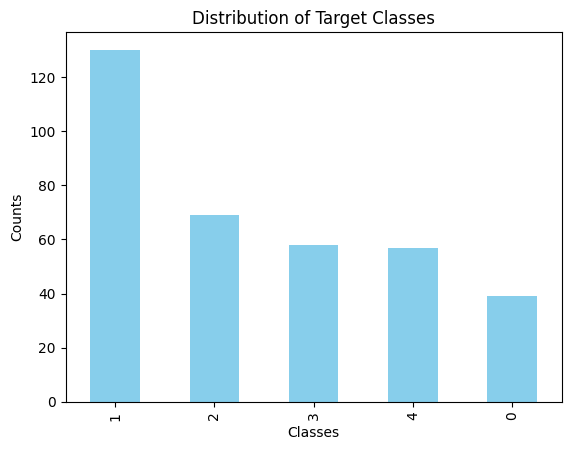

In [101]:
count=df_vote['your_vote_for'].value_counts()
count.plot(kind='bar', color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Distribution of Target Classes')
plt.show()

In [102]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np

X1, y1 = df_vote.drop(columns=['your_vote_for']), df_vote['your_vote_for']

# Split data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Select top k features using chi-squared test
k = 10  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X1_train_selected = selector.fit_transform(X1_train, y1_train)
X1_test_selected = selector.transform(X1_test)

# Get the indices of the selected features
selected_indices = np.where(selector.get_support())[0]

# Print the indices of selected features
print("Indices of selected features:", selected_indices)

Indices of selected features: [ 3 18 25 26 27 28 29 30 31 33]


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X1_train_selected and X1_test_selected are the selected features obtained after feature selection
# Assuming y1_train and y1_test are the corresponding target labels

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the selected features
rf_classifier.fit(X1_train_selected, y1_train)

# Predict on the test set
y1_pred = rf_classifier.predict(X1_test_selected)

# Evaluate accuracy
accuracy1 = accuracy_score(y1_test, y1_pred)
print("Accuracy1:", accuracy1)

Accuracy1: 0.9154929577464789


In [104]:
from sklearn.metrics import classification_report

# Assuming X1_train_selected and X1_test_selected are the selected features obtained after feature selection
# Assuming y1_train and y1_test are the corresponding target labels

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the selected features
rf_classifier.fit(X1_train_selected, y1_train)

# Predict on the test set
y1_pred = rf_classifier.predict(X1_test_selected)

# Generate classification report
report = classification_report(y1_test, y1_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.96      0.90      0.93        29
           2       0.85      0.92      0.88        12
           3       0.91      0.91      0.91        11
           4       0.92      0.92      0.92        12

    accuracy                           0.92        71
   macro avg       0.90      0.93      0.91        71
weighted avg       0.92      0.92      0.92        71



**now fitting model for df2, where target feature is "re_elect govt"**

splitting the data

In [105]:
X2 = df2.drop(columns=['re_elect govt'])
y2 = df2['re_elect govt']

In [106]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [107]:
# Select top k features using chi-squared test
k = 10  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X2_train_selected = selector.fit_transform(X2_train, y2_train)
X2_test_selected = selector.transform(X2_test)

# Get the indices of the selected features
selected_indices = np.where(selector.get_support())[0]

# Print the indices of selected features
print("Indices of selected features:", selected_indices)

Indices of selected features: [15 16 17 26 27 30 32 35 36 37]


RANDOM **FOREST**

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X2_train_selected and X2_test_selected are the selected features obtained after feature selection
# Assuming y2_train and y2_test are the corresponding target labels

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the selected features
rf_classifier.fit(X2_train_selected, y2_train)

# Predict on the test set
y2_pred = rf_classifier.predict(X2_test_selected)

# Evaluate accuracy
accuracy2 = accuracy_score(y2_test, y2_pred)
print("Accuracy2:", accuracy2)

Accuracy2: 0.9436619718309859


In [109]:
conf_matrix = confusion_matrix(y2_test, y2_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[17  4]
 [ 0 50]]


In [110]:
# Assuming X2_train_selected and X2_test_selected are the selected features obtained after feature selection
# Assuming y2_train and y2_test are the corresponding target labels

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the selected features
rf_classifier.fit(X2_train_selected, y2_train)

# Predict on the test set
y2_pred = rf_classifier.predict(X2_test_selected)

# Generate classification report
report = classification_report(y2_test, y2_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.93      1.00      0.96        50

    accuracy                           0.94        71
   macro avg       0.96      0.90      0.93        71
weighted avg       0.95      0.94      0.94        71



**LOGISTIC**

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
##logistic
model = LogisticRegression()
model.fit(X2_train, y2_train)
y3_pred = model.predict(X2_test)

# Calculate accuracy
accuracy3 = accuracy_score(y2_test, y2_pred)
print("Accuracy3:", accuracy3)

# Generate a classification report
print("Classification Report:")
print(classification_report(y2_test, y2_pred))

Accuracy3: 0.9436619718309859
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.93      1.00      0.96        50

    accuracy                           0.94        71
   macro avg       0.96      0.90      0.93        71
weighted avg       0.95      0.94      0.94        71



cross validation

In [112]:
from sklearn.model_selection import cross_val_score

# cv=5 means 5-fold cross-validation
# scoring='accuracy' specifies the metric to be used for evaluation
scores = cross_val_score(model, X2, y2, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [1.         0.97183099 1.         0.94285714 1.        ]
Mean Accuracy: 0.9829376257545273
Standard Deviation: 0.022817433696536788
